In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
import keras
from keras.regularizers import l2
from keras import regularizers
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


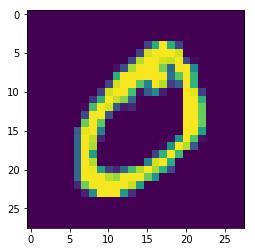

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
print(X_train.shape[0])
print(X_train.shape[1])
print(X_train.shape[2])
print(X_train.shape[3])

60000
28
28
1


In [0]:
X_train[0][3]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
# report pixel means and standard deviations
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (X_train.mean(),X_train.std(),X_test.mean(),X_test.std()))

Statistics train=0.131 (0.308), test=0.133 (0.310)


In [0]:
# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# calculate the mean on the training dataset
datagen.fit(X_train)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean,datagen.std))
# calculate the mean on the test dataset
datagen.fit(X_test)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean,datagen.std))

Data Generator mean=0.131, std=0.308
Data Generator mean=0.133, std=0.310


In [0]:
# demonstrate effect on a single batch of samples
train_generator = datagen.flow(X_train,Y_train,batch_size=128,shuffle=False)
batchX, batchy = train_generator.next()
print(batchX.shape,batchX.mean(),batchX.std())

(128, 28, 28, 1) -0.016303241 0.9803502


In [0]:
# demonstrate effect on entire training dataset
test_generator = datagen.flow(X_test,Y_test,batch_size=128,shuffle=False)
batchX, batchy = test_generator.next()
print(batchX.shape,batchX.mean(),batchX.std())

(128, 28, 28, 1) -0.045750923 0.94554704


In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3)) #24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1)) #22
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, 3))#9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3))#7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3))#5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3))#3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4))
model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4))`


In [0]:
# For retrieving the saved best results
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Defining checkpoints
from keras.callbacks import ModelCheckpoint
filepath="/content/gdrive/My Drive/Lokesh-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [0]:
print(X_train.shape)

(60000, 28, 28, 1)


In [18]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

callbacks_list.append(LearningRateScheduler(scheduler, verbose=1))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit_generator(
        train_generator,
        steps_per_epoch=128,
        epochs=40,
        validation_data=test_generator,
        callbacks=callbacks_list,
        validation_steps=600) 

Instructions for updating:
Use tf.cast instead.
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
128/128 [==============================] - 127s 991ms/step - loss: 0.5574 - acc: 0.8244 - val_loss: 0.2356 - val_acc: 0.9242

Epoch 00001: val_acc improved from -inf to 0.92421, saving model to /content/gdrive/My Drive/Lokesh-01-0.92.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
128/128 [==============================] - 123s 961ms/step - loss: 0.1348 - acc: 0.9601 - val_loss: 0.1193 - val_acc: 0.9623

Epoch 00002: val_acc improved from 0.92421 to 0.96227, saving model to /content/gdrive/My Drive/Lokesh-02-0.96.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
128/128 [==============================] - 123s 964ms/step - loss: 0.0949 - acc: 0.9710 - val_loss: 0.0587 - val_acc: 0.9804

Epoch 00003: val_acc improved from 0.96227 to 0.98036, saving model to /content/gdrive/My Driv

In [0]:
score = model.evaluate_generator(test_generator,steps=200)

In [20]:
#score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.022480760340843092, 0.9937460417986067]


In [21]:
count = model.predict_generator(test_generator,600)
print(count.shape)

(75904, 10)


In [0]:
predicted_classes = model.predict_classes(X_test)

In [23]:
print(predicted_classes)
print(len(predicted_classes))

[7 1 1 ... 4 6 6]
10000


In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)

(60000, 28, 28)


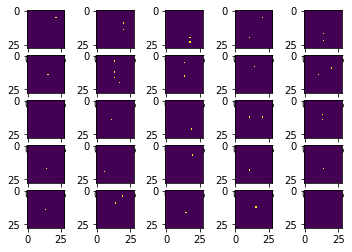

In [25]:
"""
Printing 10 images in a subplot. 
"""
print (X_train.shape)

fig, ax = plt.subplots(nrows=5, ncols=5)

i = 0

for row in ax:
	for col in row:
		if i < 100:
			col.imshow(X_train[i].astype(int))
			i += 1

In [26]:
correct = np.nonzero(predicted_classes==y_test)
print(correct)
print(len(correct))

(array([   0,    2,    3, ..., 9994, 9997, 9999]),)
1


In [27]:
incorrect = np.nonzero(predicted_classes!=y_test)
print(incorrect)

(array([   1,    7,    8, ..., 9995, 9996, 9998]),)


In [28]:
arincorr = incorrect[0][0:25]
arincorr

array([ 1,  7,  8,  9, 12, 18, 20, 23, 30, 32, 38, 43, 44, 45, 47, 52, 53,
       58, 59, 62, 63, 68, 72, 75, 76])

In [29]:
X_test[3].reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

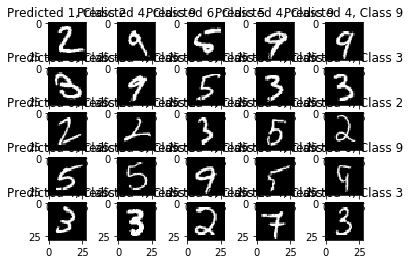

In [33]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(0)
plots = []
count = 0
for i in range(5):
    for j in range(5):
        ax = plt.subplot2grid((5,5), (i,j))
        plt.imshow(X_test[arincorr[count]].reshape(28,28),cmap='gray',interpolation='none')
        plt.title("Predicted {}, Class {}".format(predicted_classes[arincorr[count]], y_test[arincorr[count]]))
        count = count+1
plt.show() 
    
# for i in range(5):
#   for j in range(5):
#     #ax = plt.subplot2grid((5,5), (i,j))
#     for a in arincorr:
#       ax = plt.subplot2grid((5,5), (i,j))
#       ax.imshow(X_test[a].reshape(28,28), cmap='gray', interpolation='none')
#       break

# for a in arincorr:
#   plt.imshow(X_test[a].reshape(28,28), cmap='gray', interpolation='none')
          #ax.scatter(range(20),range(20)+np.random.randint(-5,5,20))
          #ax.title("plots")
#plt.show()